## Assignment 11 — Time Series Data Exploration & Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")


### Load and Parse Dates

In [4]:
df = pd.read_csv("E:/Engineering/Machine Learning/ADS-VAC/notebooks/datasets/infy_stock.csv")

# Parse date column and ensure proper dtype
df["Date"] = pd.to_datetime(df["Date"], dayfirst=False)

df.head()


,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2015-01-01,INFY,EQ,1972.55,1968.95,1982.00,1956.9,1971.00,1974.40,1971.34,500691,9.870306e+13,14908,258080,0.5154
1,2015-01-02,INFY,EQ,1974.40,1972.00,2019.05,1972.0,2017.95,2013.20,2003.25,1694580,3.394669e+14,54166,1249104,0.7371
2,2015-01-05,INFY,EQ,2013.20,2009.90,2030.00,1977.5,1996.00,1995.90,2004.59,2484256,4.979911e+14,82694,1830962,0.7370
3,2015-01-06,INFY,EQ,1995.90,1980.00,1985.00,1934.1,1965.10,1954.20,1954.82,2416829,4.724458e+14,108209,1772070,0.7332
4,2015-01-07,INFY,EQ,1954.20,1965.00,1974.75,1950.0,1966.05,1963.55,1962.59,1812479,3.557162e+14,62463,1317720,0.7270


In [5]:
df = df.set_index("Date").sort_index()
df.head()


,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2015-01-01,INFY,EQ,1972.55,1968.95,1982.00,1956.9,1971.00,1974.40,1971.34,500691,9.870306e+13,14908,258080,0.5154
2015-01-02,INFY,EQ,1974.40,1972.00,2019.05,1972.0,2017.95,2013.20,2003.25,1694580,3.394669e+14,54166,1249104,0.7371
2015-01-05,INFY,EQ,2013.20,2009.90,2030.00,1977.5,1996.00,1995.90,2004.59,2484256,4.979911e+14,82694,1830962,0.7370
2015-01-06,INFY,EQ,1995.90,1980.00,1985.00,1934.1,1965.10,1954.20,1954.82,2416829,4.724458e+14,108209,1772070,0.7332
2015-01-07,INFY,EQ,1954.20,1965.00,1974.75,1950.0,1966.05,1963.55,1962.59,1812479,3.557162e+14,62463,1317720,0.7270


### Visualize Raw Time Series (Close Price)

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 248 entries, 2015-01-01 to 2015-12-31
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Symbol              248 non-null    object 
 1   Series              248 non-null    object 
 2   Prev Close          248 non-null    float64
 3   Open                248 non-null    float64
 4   High                248 non-null    float64
 5   Low                 248 non-null    float64
 6   Last                248 non-null    float64
 7   Close               248 non-null    float64
 8   VWAP                248 non-null    float64
 9   Volume              248 non-null    int64  
 10  Turnover            248 non-null    float64
 11  Trades              248 non-null    int64  
 12  Deliverable Volume  248 non-null    int64  
 13  %Deliverble         248 non-null    float64
dtypes: float64(9), int64(3), object(2)
memory usage: 29.1+ KB


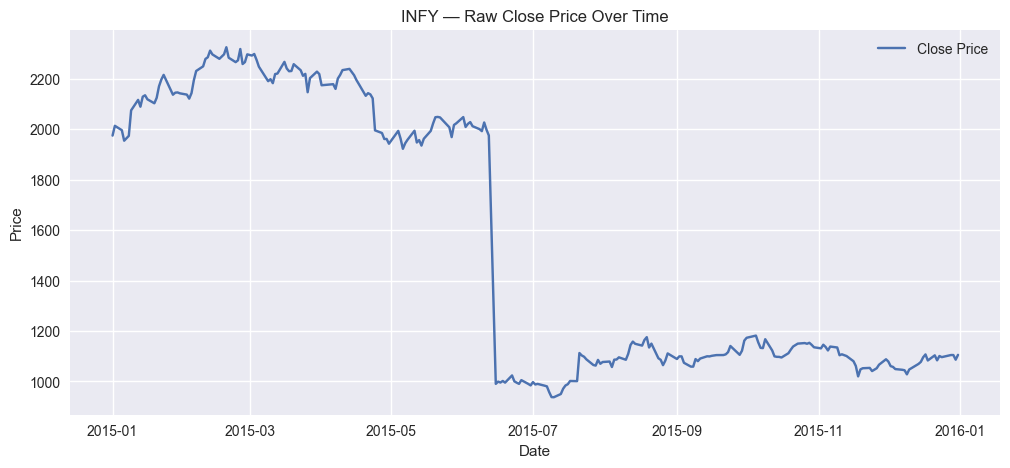

In [7]:
plt.figure(figsize=(12,5))
plt.plot(df.index, df["Close"], label="Close Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("INFY — Raw Close Price Over Time")
plt.legend()
plt.show()


This shows the trend and volatility over time.
Good for understanding structure before ARIMA/SARIMA later.

### Missing Timestamp Detection

### Create Full Daily Index

In [8]:
full_index = pd.date_range(start=df.index.min(), end=df.index.max(), freq="D")


### Reindex the DataFrame

In [9]:
df_full = df.reindex(full_index)

df_full.head(10)


,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
2015-01-01,INFY,EQ,1972.55,1968.95,1982.00,1956.90,1971.00,1974.40,1971.34,500691.0,9.870306e+13,14908.0,258080.0,0.5154
2015-01-02,INFY,EQ,1974.40,1972.00,2019.05,1972.00,2017.95,2013.20,2003.25,1694580.0,3.394669e+14,54166.0,1249104.0,0.7371
2015-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,INFY,EQ,2013.20,2009.90,2030.00,1977.50,1996.00,1995.90,2004.59,2484256.0,4.979911e+14,82694.0,1830962.0,0.7370
2015-01-06,INFY,EQ,1995.90,1980.00,1985.00,1934.10,1965.10,1954.20,1954.82,2416829.0,4.724458e+14,108209.0,1772070.0,0.7332
2015-01-07,INFY,EQ,1954.20,1965.00,1974.75,1950.00,1966.05,1963.55,1962.59,1812479.0,3.557162e+14,62463.0,1317720.0,0.7270
2015-01-08,INFY,EQ,1963.55,1985.60,1997.00,1950.00,1979.25,1973.45,1972.78,3391230.0,6.690160e+14,92752.0,2686012.0,0.7920
2015-01-09,INFY,EQ,1973.45,1980.10,2109.00,1913.05,2075.30,2074.45,2037.69,11215832.0,2.285439e+15,359214.0,3369489.0,0.3004
2015-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Count Missing Timestamps

In [10]:
missing_dates = df_full[df_full.isna().any(axis=1)]
missing_dates.head()


,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
2015-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Count Total Missing Days

In [11]:
len(missing_dates)


117

### Fill Missing Values

In [12]:
df_filled = df_full.ffill()


### Compare Before and After Filling

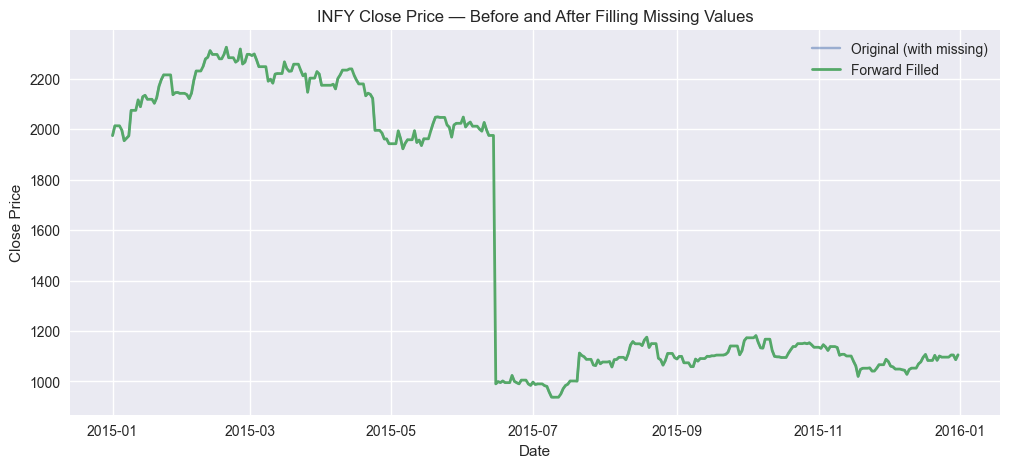

In [13]:
plt.figure(figsize=(12,5))
plt.plot(df_full.index, df_full["Close"], label="Original (with missing)", alpha=0.5)
plt.plot(df_filled.index, df_filled["Close"], label="Forward Filled", linewidth=2)
plt.title("INFY Close Price — Before and After Filling Missing Values")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()
